# Project 1 - FBI Gun Data (Israa Salah)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#summ">Summary of Data Cleaning</a></li>
<li><a href="#ques">Questions to be answered</a></li>
<li><a href="#import">Import packages, CSV and Excel files</a></li>
<li><a href="#cleanAnalyze">Cleaning, and Analysing Data</a></li>
<li><a href="#answer">Answering Questions</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
# Introduction
> **Data set Analyzed**: I chose to work on FBI Gun Data working on US Census.csv and gun data.xlsx


<a id='summ'></a>

# Summary of Data Cleaning

Excel sheets worked with: **'U.S. Census Data.csv'** and **'gun_data.xlsx'**

 Started by cleaning Data: Data cleaning in df_census/'U.S. Census Data.csv': 
 
> 1)  Cleaned the data removing the notes at the end of the csv file. Rows with index above index 65 were removed.
>
> 2) Replaced ['-','D','F','FN','NA','S','X','Z'] in df to prepare for next steps of cleaning data
> 
> 3) Checked the data type of all columns of df_census "'U.S. Census Data.csv'" and df_fun from "gun_data"
> 
> 4) Created functions to convert string columns to int and float. 
> 
> 5) The created function removed the $ , and % signs
> 
> 6) Double checked if Data has an NA values. 
> 
> 7) Chosed the rows / columns to include in my analysis.
> 
> 8) Change the column names in us_census data and gun data e.g state on both sheets are in lower case to merge easily. 
> 
> 9) Removed 5 colonies from gun data as it's not represented in US Census data

<a id='ques'></a>
# Questions to be answered

Questions to be answered. 
> 1) What census data is most associated with high gun per capita?
> 
> 2) Which states have had the highest growth in gun across 2010,2015,2016,2017?
> 
> 3) What is the ove)rall trend of gun purchases in the states mentioned in point 2?
> 
> 4) Is there a relation between demographics and total guns (e.g race/gender)

Please refer to the conclusion section at the bottom of this jupyter note. 

<a id='import'></a>
# Import packages, CSV and Excel files

# Import Libraries / packages

In [414]:
##### Import libs ######
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.options.mode.chained_assignment = None  # default='warn'


%matplotlib inline

# Import csv / xlsx files

In [415]:
## Import the csv files

file_path='C:/Users/israa_salah/Desktop/isalah/DataAnalysisCourse/Projects/Project1/ncis-and-census-data/'
df_census=pd.read_csv(file_path+'U.S. Census Data.csv')
df_gun=pd.read_excel(file_path+'gun_data.xlsx')


# Cleaning Data (census data)

In [416]:
df_gun.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12485 entries, 0 to 12484
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   month                      12485 non-null  object 
 1   state                      12485 non-null  object 
 2   permit                     12461 non-null  float64
 3   permit_recheck             1100 non-null   float64
 4   handgun                    12465 non-null  float64
 5   long_gun                   12466 non-null  float64
 6   other                      5500 non-null   float64
 7   multiple                   12485 non-null  int64  
 8   admin                      12462 non-null  float64
 9   prepawn_handgun            10542 non-null  float64
 10  prepawn_long_gun           10540 non-null  float64
 11  prepawn_other              5115 non-null   float64
 12  redemption_handgun         10545 non-null  float64
 13  redemption_long_gun        10544 non-null  flo

In [417]:
df_gun.describe()

permit  permit_recheck        handgun       long_gun  \
count   12461.000000     1100.000000   12465.000000   12466.000000   
mean     6413.629404     1165.956364    5940.881107    7810.847585   
std     23752.338269     9224.200609    8618.584060    9309.846140   
min         0.000000        0.000000       0.000000       0.000000   
25%         0.000000        0.000000     865.000000    2078.250000   
50%       518.000000        0.000000    3059.000000    5122.000000   
75%      4272.000000        0.000000    7280.000000   10380.750000   
max    522188.000000   116681.000000  107224.000000  108058.000000   

              other      multiple         admin  prepawn_handgun  \
count   5500.000000  12485.000000  12462.000000     10542.000000   
mean     360.471636    268.603364     58.898090         4.828021   
std     1349.478273    783.185073    604.814818        10.907756   
min        0.000000      0.000000      0.000000         0.000000   
25%       17.000000     15.000000      0.000000         0.000000   
50%      121.000000    125.000000      0.000000         0.000000   
75%      354.000000    301.000000      0.000000         5.000000   
max    77929.000000  38907.000000  28083.000000       164.000000   

       prepawn_long_gun  prepawn_other  ...  returned_other  rentals_handgun  \
count      10540.000000    5115.000000  ...     1815.000000       990.000000   
mean           7.834156       0.165591  ...        1.027548         0.076768   
std           16.468028       1.057105  ...        4.386296         0.634503   
min            0.000000       0.000000  ...        0.000000         0.000000   
25%            0.000000       0.000000  ...        0.000000         0.000000   
50%            1.000000       0.000000  ...        0.000000         0.000000   
75%            8.000000       0.000000  ...        0.000000         0.000000   
max          269.000000      49.000000  ...       64.000000        12.000000   

       rentals_long_gun  private_sale_handgun  private_sale_long_gun  \
count        825.000000           2750.000000            2750.000000   
mean           0.087273             14.936000              11.602909   
std            0.671649             71.216021              54.253090   
min            0.000000              0.000000               0.000000   
25%            0.000000              0.000000               0.000000   
50%            0.000000              0.000000               0.000000   
75%            0.000000              2.000000               4.000000   
max           12.000000           1017.000000             777.000000   

       private_sale_other  return_to_seller_handgun  \
count         2750.000000               2475.000000   
mean             1.030182                  0.402020   
std              4.467843                  1.446568   
min              0.000000                  0.000000   
25%              0.000000                  0.000000   
50%              0.000000                  0.000000   
75%              0.000000                  0.000000   
max             71.000000                 28.000000   

       return_to_seller_long_gun  return_to_seller_other         totals  
count                2750.000000             2255.000000   12485.000000  
mean                    0.441818                0.105987   21595.725911  
std                     1.528223                0.427363   32591.418387  
min                     0.000000                0.000000       0.000000  
25%                     0.000000                0.000000    4638.000000  
50%                     0.000000                0.000000   12399.000000  
75%                     0.000000                0.000000   25453.000000  
max                    17.000000                4.000000  541978.000000  

[8 rows x 25 columns]

In [418]:
df_gun.columns  #Important note, all column names are in lower case and since state name will be used in merging data. 
                #df_census column state has to be in lower case

Index(['month', 'state', 'permit', 'permit_recheck', 'handgun', 'long_gun',
       'other', 'multiple', 'admin', 'prepawn_handgun', 'prepawn_long_gun',
       'prepawn_other', 'redemption_handgun', 'redemption_long_gun',
       'redemption_other', 'returned_handgun', 'returned_long_gun',
       'returned_other', 'rentals_handgun', 'rentals_long_gun',
       'private_sale_handgun', 'private_sale_long_gun', 'private_sale_other',
       'return_to_seller_handgun', 'return_to_seller_long_gun',
       'return_to_seller_other', 'totals'],
      dtype='object')

Cleaning Data (census data)


In [419]:
df_gun.shape

(12485, 27)

In [420]:
states_gun= df_gun['state'].unique().tolist()
print(str(len(states_gun))+" states")
print(states_gun)

55 states
['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut', 'Delaware', 'District of Columbia', 'Florida', 'Georgia', 'Guam', 'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Mariana Islands', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico', 'New York', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 'Puerto Rico', 'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virgin Islands', 'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming']


Remove the 5 colonies from the df_gun data 

In [421]:
df_gun.drop(df_gun[df_gun['state'] == 'District of Columbia'].index, inplace = True)
df_gun.drop(df_gun[df_gun['state'] == 'Puerto Rico'].index, inplace = True)
df_gun.drop(df_gun[df_gun['state'] == 'Guam'].index, inplace = True)
df_gun.drop(df_gun[df_gun['state'] == 'Virgin Islands'].index, inplace = True)
df_gun.drop(df_gun[df_gun['state'] == 'Mariana Islands'].index, inplace = True)


Double checking if the five colonies are actually removed

In [422]:
df_gun.shape  

(11350, 27)

Double checking data types in gun data: 

In [423]:
df_gun.dtypes

month                         object
state                         object
permit                       float64
permit_recheck               float64
handgun                      float64
long_gun                     float64
other                        float64
multiple                       int64
admin                        float64
prepawn_handgun              float64
prepawn_long_gun             float64
prepawn_other                float64
redemption_handgun           float64
redemption_long_gun          float64
redemption_other             float64
returned_handgun             float64
returned_long_gun            float64
returned_other               float64
rentals_handgun              float64
rentals_long_gun             float64
private_sale_handgun         float64
private_sale_long_gun        float64
private_sale_other           float64
return_to_seller_handgun     float64
return_to_seller_long_gun    float64
return_to_seller_other       float64
totals                         int64
d

Confirming the data type of column month that will be used to calculate capita / trends of guns totals:


In [424]:
type(df_gun['state'][0])

str

In [425]:
type(df_gun['totals'][0])

numpy.int64

Automatically a day will be added to the date format of month so instead of having 2017-09, we will get 2017-09-01. 
So a new df for calculating capita will be created to preserve the original status of the gun data sheet 

In [426]:

print(type(df_gun['month'][0]))
#df_gun['month']=pd.to_datetime(df_gun['month']) 
#print(df_gun['month']) 

<class 'str'>


Will use three columns only for analysis from df_gun: state, month, and totals. 
Will change the data type of month from string to datetime
State data type is string and the data format will be kept
totals are integers and the data format will be kept. 

In [427]:
df_capita=df_gun[['month','state','totals']]

In [428]:
# double checking the data types of df_capita
df_capita.dtypes
type(df_capita['state'][0])

str

Convert month from string to datetime format.


In [429]:
df_capita['month']=pd.to_datetime(df_capita['month']) #used .loc to overwrite warning: A value is trying to be set on a copy of a slice from a DataFrame.
print(type(df_capita['month'][0]))
print((df_capita['month'][0]))

<class 'pandas._libs.tslibs.timestamps.Timestamp'>
2017-09-01 00:00:00


In [430]:
df_capita.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11350 entries, 0 to 12484
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   month   11350 non-null  datetime64[ns]
 1   state   11350 non-null  object        
 2   totals  11350 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 612.7+ KB


Creating seperate df_capita for July 1, 2016, and April 1, 2010.

Census data has number from July 1, 2016, and April 1, 2010.
Will create df_capita for July 1 2016 and April 1 2010 

In [431]:

df_capita2016= df_capita[df_capita['month']=='2016-07-01']
df_capita2010= df_capita[df_capita['month']=='2010-04-01']

print("Total rows in df_capita2016: "+str(len(df_capita2016)))
print("\nTotal rows in df_capita2010: "+str(len(df_capita2010)))
print("\nhead of df_capita2016")
print((df_capita2016).head())
print("\nhead of df_capita2010")
print((df_capita2010).head())
print("\n Top states in capita in 2016:")
print(df_capita2016.sort_values("totals",ascending=False).head())

print("\n Top states in capita in 2010:")
print(df_capita2010.sort_values("totals",ascending=False).head())

Total rows in df_capita2016: 50

Total rows in df_capita2010: 50

head of df_capita2016
         month       state  totals
770 2016-07-01     Alabama   48927
771 2016-07-01      Alaska    6793
772 2016-07-01     Arizona   34496
773 2016-07-01    Arkansas   19378
774 2016-07-01  California  190218

head of df_capita2010
          month       state  totals
4895 2010-04-01     Alabama   20791
4896 2010-04-01      Alaska    6411
4897 2010-04-01     Arizona   16578
4898 2010-04-01    Arkansas   14563
4899 2010-04-01  California   80750

 Top states in capita in 2016:
         month       state  totals
788 2016-07-01    Kentucky  363085
774 2016-07-01  California  190218
784 2016-07-01    Illinois  168227
816 2016-07-01       Texas  127207
779 2016-07-01     Florida  125208

 Top states in capita in 2010:
          month       state  totals
4913 2010-04-01    Kentucky  211261
4942 2010-04-01        Utah  109391
4899 2010-04-01  California   80750
4941 2010-04-01       Texas   65012
4909 2010

Concatenate the two dataframes for capita 2010 and 2016


In [432]:
df_capita_concat= pd.concat([df_capita2010,df_capita2016 ],axis=0)
df_capita_concat.reset_index(drop=True, inplace=True)
df_capita_concat

month          state  totals
0  2010-04-01        Alabama   20791
1  2010-04-01         Alaska    6411
2  2010-04-01        Arizona   16578
3  2010-04-01       Arkansas   14563
4  2010-04-01     California   80750
..        ...            ...     ...
95 2016-07-01       Virginia   43574
96 2016-07-01     Washington   47887
97 2016-07-01  West Virginia   16791
98 2016-07-01      Wisconsin   38922
99 2016-07-01        Wyoming    4585

[100 rows x 3 columns]

<a id='cleanAnalyze'></a>

# Cleaning & Analyzing data

# Cleaning Data (census data)

Get list of states of df_census and df_gun to verify if we have the states: 

In [433]:
## Get list of states of df_census and df_gun to verify if we have the states: 

states_census=df_census.columns.tolist()
states_census.remove('Fact')
states_census.remove('Fact Note')
print((states_census))


['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico', 'New York', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming']


Note: States in census data are 50, df_gun needs had the states below removed: 
>'District of Columbia'

>'Puerto Rico'

>'Guam'

>'Virgin Islands'

>'Mariana Islands

In [434]:
df_census.head()

Fact Fact Note    Alabama  \
0       Population estimates, July 1, 2016,  (V2016)       NaN  4,863,300   
1  Population estimates base, April 1, 2010,  (V2...       NaN  4,780,131   
2  Population, percent change - April 1, 2010 (es...       NaN      1.70%   
3                  Population, Census, April 1, 2010       NaN  4,779,736   
4  Persons under 5 years, percent, July 1, 2016, ...       NaN      6.00%   

    Alaska    Arizona   Arkansas  California   Colorado Connecticut Delaware  \
0  741,894  6,931,071  2,988,248  39,250,017  5,540,545   3,576,452  952,065   
1  710,249  6,392,301  2,916,025  37,254,522  5,029,324   3,574,114  897,936   
2    4.50%      8.40%      2.50%       5.40%     10.20%       0.10%    6.00%   
3  710,231  6,392,017  2,915,918  37,253,956  5,029,196   3,574,097  897,934   
4    7.30%      6.30%      6.40%       6.30%      6.10%       5.20%    5.80%   

   ... South Dakota Tennessee       Texas       Utah  Vermont   Virginia  \
0  ...       865454   6651194  27,862,596  3,051,217  624,594  8,411,808   
1  ...       814195   6346298  25,146,100  2,763,888  625,741  8,001,041   
2  ...        0.063     0.048      10.80%     10.40%   -0.20%      5.10%   
3  ...       814180   6346105  25,145,561  2,763,885  625,741  8,001,024   
4  ...        0.071     0.061       7.20%      8.30%    4.90%      6.10%   

  Washington West Virginia  Wisconsin  Wyoming  
0  7,288,000     1,831,102  5,778,708  585,501  
1  6,724,545     1,853,011  5,687,289  563,767  
2      8.40%        -1.20%      1.60%    3.90%  
3  6,724,540     1,852,994  5,686,986  563,626  
4      6.20%         5.50%      5.80%    6.50%  

[5 rows x 52 columns]

In [435]:
df_census.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 52 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Fact            80 non-null     object
 1   Fact Note       28 non-null     object
 2   Alabama         65 non-null     object
 3   Alaska          65 non-null     object
 4   Arizona         65 non-null     object
 5   Arkansas        65 non-null     object
 6   California      65 non-null     object
 7   Colorado        65 non-null     object
 8   Connecticut     65 non-null     object
 9   Delaware        65 non-null     object
 10  Florida         65 non-null     object
 11  Georgia         65 non-null     object
 12  Hawaii          65 non-null     object
 13  Idaho           65 non-null     object
 14  Illinois        65 non-null     object
 15  Indiana         65 non-null     object
 16  Iowa            65 non-null     object
 17  Kansas          65 non-null     object
 18  Kentucky    

In [436]:
df_census.dtypes

Fact              object
Fact Note         object
Alabama           object
Alaska            object
Arizona           object
Arkansas          object
California        object
Colorado          object
Connecticut       object
Delaware          object
Florida           object
Georgia           object
Hawaii            object
Idaho             object
Illinois          object
Indiana           object
Iowa              object
Kansas            object
Kentucky          object
Louisiana         object
Maine             object
Maryland          object
Massachusetts     object
Michigan          object
Minnesota         object
Mississippi       object
Missouri          object
Montana           object
Nebraska          object
Nevada            object
New Hampshire     object
New Jersey        object
New Mexico        object
New York          object
North Carolina    object
North Dakota      object
Ohio              object
Oklahoma          object
Oregon            object
Pennsylvania      object


In [437]:
df_census.shape

(85, 52)

In [438]:
# Get list of the states covered in census data
states=df_census.columns


print("Report covers "+str(len(states))+" of the United states:")
print((states))  

Report covers 52 of the United states:
Index(['Fact', 'Fact Note', 'Alabama', 'Alaska', 'Arizona', 'Arkansas',
       'California', 'Colorado', 'Connecticut', 'Delaware', 'Florida',
       'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas',
       'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts',
       'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana',
       'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico',
       'New York', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma',
       'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina',
       'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia',
       'Washington', 'West Virginia', 'Wisconsin', 'Wyoming'],
      dtype='object')


Removing the unwanted column 'Fact Note' & Rows after line 65.
Replacing the variables mentioned in the Fact notes. 

In [440]:
df_Fact=df_census[['Fact','Fact Note']].iloc[66:].reset_index(drop=True) #Seperate df for Fact and Fact Note. 
df_census_notes=df_census[['Fact','Fact Note']].iloc[:65] #Notes by the end of the sheet included. 
df_census.drop('Fact Note',axis='columns',inplace=True)
#df_census.set_index("Fact",inplace=True)
df_census=df_census.iloc[:65]  # Only the first 65 lines of the sheet will be included. There is a seperate df_census_notes
                               # for the removed lines
list_toBe_replaced=['-','D','F','FN','NA','S','X','Z'] 
df_census.replace(to_replace=list_toBe_replaced, value ="0",inplace=True) #Values in the csv will be handled as zero in order to prodceed with the analysis


Fill na values:


In [441]:
df_census= df_census.fillna(0)


In [442]:
# confirm the columns
df_census.columns

Index(['Fact', 'Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii',
       'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky',
       'Louisiana', 'Maine', 'Maryland', 'Massachusetts', 'Michigan',
       'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota',
       'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming'],
      dtype='object')

In [443]:
df_census.set_index('Fact',inplace=True)
df_census.columns

Index(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota',
       'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming'],
      dtype='object')

In [444]:
df_census = df_census.T.reset_index()
df_census.columns

Index(['index', 'Population estimates, July 1, 2016,  (V2016)',
       'Population estimates base, April 1, 2010,  (V2016)',
       'Population, percent change - April 1, 2010 (estimates base) to July 1, 2016,  (V2016)',
       'Population, Census, April 1, 2010',
       'Persons under 5 years, percent, July 1, 2016,  (V2016)',
       'Persons under 5 years, percent, April 1, 2010',
       'Persons under 18 years, percent, July 1, 2016,  (V2016)',
       'Persons under 18 years, percent, April 1, 2010',
       'Persons 65 years and over, percent,  July 1, 2016,  (V2016)',
       'Persons 65 years and over, percent, April 1, 2010',
       'Female persons, percent,  July 1, 2016,  (V2016)',
       'Female persons, percent, April 1, 2010',
       'White alone, percent, July 1, 2016,  (V2016)',
       'Black or African American alone, percent, July 1, 2016,  (V2016)',
       'American Indian and Alaska Native alone, percent, July 1, 2016,  (V2016)',
       'Asian alone, percent, July 1, 20

In [445]:
df_census.head()

Fact       index Population estimates, July 1, 2016,  (V2016)  \
0        Alabama                                    4,863,300   
1         Alaska                                      741,894   
2        Arizona                                    6,931,071   
3       Arkansas                                    2,988,248   
4     California                                   39,250,017   

Fact Population estimates base, April 1, 2010,  (V2016)  \
0                                             4,780,131   
1                                               710,249   
2                                             6,392,301   
3                                             2,916,025   
4                                            37,254,522   

Fact Population, percent change - April 1, 2010 (estimates base) to July 1, 2016,  (V2016)  \
0                                                 1.70%                                      
1                                                 4.50%                                      
2                                                 8.40%                                      
3                                                 2.50%                                      
4                                                 5.40%                                      

Fact Population, Census, April 1, 2010  \
0                            4,779,736   
1                              710,231   
2                            6,392,017   
3                            2,915,918   
4                           37,253,956   

Fact Persons under 5 years, percent, July 1, 2016,  (V2016)  \
0                                                 6.00%       
1                                                 7.30%       
2                                                 6.30%       
3                                                 6.40%       
4                                                 6.30%       

Fact Persons under 5 years, percent, April 1, 2010  \
0                                            6.40%   
1                                            7.60%   
2                                            7.10%   
3                                            6.80%   
4                                            6.80%   

Fact Persons under 18 years, percent, July 1, 2016,  (V2016)  \
0                                                22.60%        
1                                                25.20%        
2                                                23.50%        
3                                                23.60%        
4                                                23.20%        

Fact Persons under 18 years, percent, April 1, 2010  \
0                                            23.70%   
1                                            26.40%   
2                                            25.50%   
3                                            24.40%   
4                                            25.00%   

Fact Persons 65 years and over, percent,  July 1, 2016,  (V2016)  ...  \
0                                                16.10%           ...   
1                                                10.40%           ...   
2                                                16.90%           ...   
3                                                16.30%           ...   
4                                                13.60%           ...   

Fact All firms, 2012 Men-owned firms, 2012 Women-owned firms, 2012  \
0            374,153               203,604                 137,630   
1             68,032                35,402                  22,141   
2            499,926               245,243                 182,425   
3            231,959               123,158                  75,962   
4          3,548,449             1,852,580               1,320,085   

Fact Minority-owned firms, 2012 Nonminority-owned firms, 2012  \
0                        92,219                       272,651   
1                        1

In [446]:
df_census.rename(columns={'index':'state'},inplace = True) # rename column index to column state and this will help with merging 
df_census.head()

Fact       state Population estimates, July 1, 2016,  (V2016)  \
0        Alabama                                    4,863,300   
1         Alaska                                      741,894   
2        Arizona                                    6,931,071   
3       Arkansas                                    2,988,248   
4     California                                   39,250,017   

Fact Population estimates base, April 1, 2010,  (V2016)  \
0                                             4,780,131   
1                                               710,249   
2                                             6,392,301   
3                                             2,916,025   
4                                            37,254,522   

Fact Population, percent change - April 1, 2010 (estimates base) to July 1, 2016,  (V2016)  \
0                                                 1.70%                                      
1                                                 4.50%                                      
2                                                 8.40%                                      
3                                                 2.50%                                      
4                                                 5.40%                                      

Fact Population, Census, April 1, 2010  \
0                            4,779,736   
1                              710,231   
2                            6,392,017   
3                            2,915,918   
4                           37,253,956   

Fact Persons under 5 years, percent, July 1, 2016,  (V2016)  \
0                                                 6.00%       
1                                                 7.30%       
2                                                 6.30%       
3                                                 6.40%       
4                                                 6.30%       

Fact Persons under 5 years, percent, April 1, 2010  \
0                                            6.40%   
1                                            7.60%   
2                                            7.10%   
3                                            6.80%   
4                                            6.80%   

Fact Persons under 18 years, percent, July 1, 2016,  (V2016)  \
0                                                22.60%        
1                                                25.20%        
2                                                23.50%        
3                                                23.60%        
4                                                23.20%        

Fact Persons under 18 years, percent, April 1, 2010  \
0                                            23.70%   
1                                            26.40%   
2                                            25.50%   
3                                            24.40%   
4                                            25.00%   

Fact Persons 65 years and over, percent,  July 1, 2016,  (V2016)  ...  \
0                                                16.10%           ...   
1                                                10.40%           ...   
2                                                16.90%           ...   
3                                                16.30%           ...   
4                                                13.60%           ...   

Fact All firms, 2012 Men-owned firms, 2012 Women-owned firms, 2012  \
0            374,153               203,604                 137,630   
1             68,032                35,402                  22,141   
2            499,926               245,243                 182,425   
3            231,959               123,158                  75,962   
4          3,548,449             1,852,580               1,320,085   

Fact Minority-owned firms, 2012 Nonminority-owned firms, 2012  \
0                        92,219                       272,651   
1                        1

In [447]:
df_census.columns

Index(['state', 'Population estimates, July 1, 2016,  (V2016)',
       'Population estimates base, April 1, 2010,  (V2016)',
       'Population, percent change - April 1, 2010 (estimates base) to July 1, 2016,  (V2016)',
       'Population, Census, April 1, 2010',
       'Persons under 5 years, percent, July 1, 2016,  (V2016)',
       'Persons under 5 years, percent, April 1, 2010',
       'Persons under 18 years, percent, July 1, 2016,  (V2016)',
       'Persons under 18 years, percent, April 1, 2010',
       'Persons 65 years and over, percent,  July 1, 2016,  (V2016)',
       'Persons 65 years and over, percent, April 1, 2010',
       'Female persons, percent,  July 1, 2016,  (V2016)',
       'Female persons, percent, April 1, 2010',
       'White alone, percent, July 1, 2016,  (V2016)',
       'Black or African American alone, percent, July 1, 2016,  (V2016)',
       'American Indian and Alaska Native alone, percent, July 1, 2016,  (V2016)',
       'Asian alone, percent, July 1, 20

In [448]:
### Renaming the columns for easy access: 

### Rows to be convered to columns in US Census data sheet. 
col_Jul2016_pop='Population estimates, July 1, 2016,  (V2016)'
col_Apr2010_pop='Population estimates base, April 1, 2010,  (V2016)'
col_PopulationChange='Population, percent change - April 1, 2010 (estimates base) to July 1, 2016,  (V2016)' ## float
col_Apr2010_popC='Population, Census, April 1, 2010' #int
col_Under5_2016 = 'Persons under 5 years, percent, July 1, 2016,  (V2016)'
col__Under5_2010  = 'Persons under 5 years, percent, April 1, 2010'
col__Under18_2016  = 'Persons under 18 years, percent, July 1, 2016,  (V2016)'
col__Under18_2010 = 'Persons under 18 years, percent, April 1, 2010'
col_Above65_2016 = 'Persons 65 years and over, percent,  July 1, 2016,  (V2016)'
col_Above65_2010 = 'Persons 65 years and over, percent, April 1, 2010'
col_Female_2016 = 'Female persons, percent,  July 1, 2016,  (V2016)'
col_Female_2010 = 'Female persons, percent, April 1, 2010'
col_White_2016 = 'White alone, percent, July 1, 2016,  (V2016)'
col_Black_2016 = 'Black or African American alone, percent, July 1, 2016,  (V2016)'
col_Native_2016 = 'American Indian and Alaska Native alone, percent, July 1, 2016,  (V2016)'
col_Asian_2016 = 'Asian alone, percent, July 1, 2016,  (V2016)'
col_NativeHP_2016 = 'Native Hawaiian and Other Pacific Islander alone, percent, July 1, 2016,  (V2016)'
col_Mixed_2016 = 'Two or More Races, percent, July 1, 2016,  (V2016)'
col_Latino_2016 = 'Hispanic or Latino, percent, July 1, 2016,  (V2016)'
col_WhiteNotLatino = 'White alone, not Hispanic or Latino, percent, July 1, 2016,  (V2016)'
col_veterans='Veterans, 2011-2015'
col_ForeignPercent201115='Foreign born persons, percent, 2011-2015'


In [449]:
### Functions to clean Data:

'''
Created functions to convert the srtings in Dataframes to Float. 
The functions is named based on the column in question (Percentage, numbers with "," , and Price that includes ($,,))

'''
def Convert_To_FloatPercent(df_old,col):
    """
    Convert_ToFloatPercent converts df column that has % to float. Percentage sign "%" is removed before conversion to float.   
    """
    df_temp=df_old[['state',col]]
    temp=(df_temp[col]).replace('%','',regex=True).astype(float)
    df_temp[col]=temp
    return df_temp

def Convert_Price_To_Float(df_old,col,df_new):
    """
    Convert_Price_To_Float converts df column that has $ to float. Percentage sign "$" is removed before conversion to float.   
    """
    df_temp=df_old[['state',col]]
    temp=(df_temp[col]).replace('\$','',regex=True).astype(float)
    df_temp[col]=temp
    return df_temp


def Convert_To_Float(df_old,col):
    """
    Convert_To_Float converts df column that has "," to float. Percentage sign "," is removed before conversion to float.   
    """
    df_temp=df_old[['state',col]]
    temp=(df_temp[col]).replace(',','',regex=True).astype(float)
    df_temp[col]=temp
    return df_temp




In [450]:
print (Convert_To_FloatPercent.__doc__) 
print(Convert_Price_To_Float.__doc__)
print(Convert_To_Float.__doc__)



    Convert_ToFloatPercent converts df column that has % to float. Percentage sign "%" is removed before conversion to float.   
    

    Convert_Price_To_Float converts df column that has $ to float. Percentage sign "$" is removed before conversion to float.   
    

    Convert_To_Float converts df column that has "," to float. Percentage sign "," is removed before conversion to float.   
    


In [451]:
# Cleaning Data for census data 2016 to create df_cPop2016

In [452]:
#use function Convert_To_Float to have col July 2016 population to df. 
df_cPop2016=pd.DataFrame()
df_cPop2016= Convert_To_Float(df_census,col_Jul2016_pop)
df_cPop2016.head()

Fact       state  Population estimates, July 1, 2016,  (V2016)
0        Alabama                                     4863300.0
1         Alaska                                      741894.0
2        Arizona                                     6931071.0
3       Arkansas                                     2988248.0
4     California                                    39250017.0

Cleaning Data for census data 2010 to create df_cPop2010

In [453]:
#use function Convert_To_Float to have col April 2010 population to df. 
df_cPop2010=pd.DataFrame()
df_cPop2010= Convert_To_Float(df_census,col_Apr2010_pop)
df_cPop2010.head()


Fact       state  Population estimates base, April 1, 2010,  (V2016)
0        Alabama                                          4780131.0 
1         Alaska                                           710249.0 
2        Arizona                                          6392301.0 
3       Arkansas                                          2916025.0 
4     California                                         37254522.0

Top states with total guns in April 2010

In [454]:
#### Clean Population Data for percent of Females on 2010
population_2010Females= Convert_To_FloatPercent(df_census,col_Female_2010)

#### Clean Population Data for percent of White on 2016
population_2016White = Convert_To_FloatPercent(df_census,col_White_2016)
  
#### Clean Population Data for percent of Black on 2016
population_2016Black = Convert_To_FloatPercent(df_census,col_Black_2016)
  
#### Clean Population Data for percent of Native on 2016
population_2016Native = Convert_To_FloatPercent(df_census,col_Native_2016)

#### Clean Population Data for percent of Asian on 2016
population_2016Asian = Convert_To_FloatPercent(df_census,col_Asian_2016)

#### Clean Population Data for percent of Native Hawaiian on 2016
population_2016NH = Convert_To_FloatPercent(df_census,col_NativeHP_2016) 

#### Clean Population Data for percent of Mixed race on 2016
population_2016Mixed = Convert_To_FloatPercent(df_census,col_Mixed_2016) 

#### Clean Population Data for percent of Latino on 2016
population_2016Latino = Convert_To_FloatPercent(df_census,col_Latino_2016) 


In [455]:
df_cPop2010


Fact           state  Population estimates base, April 1, 2010,  (V2016)
0            Alabama                                          4780131.0 
1             Alaska                                           710249.0 
2            Arizona                                          6392301.0 
3           Arkansas                                          2916025.0 
4         California                                         37254522.0 
5           Colorado                                          5029324.0 
6        Connecticut                                          3574114.0 
7           Delaware                                           897936.0 
8            Florida                                         18804592.0 
9            Georgia                                          9688680.0 
10            Hawaii                                          1360301.0 
11             Idaho                                          1567650.0 
12          Illinois                                         12831574.0 
13           Indiana                                          6484136.0 
14              Iowa                                          3046869.0 
15            Kansas                                          2853129.0 
16          Kentucky                                          4339344.0 
17         Louisiana                                          4533479.0 
18             Maine                                          1328364.0 
19          Maryland                                          5773786.0 
20     Massachusetts                                          6547813.0 
21          Michigan                                          9884129.0 
22         Minnesota                                          5303924.0 
23       Mississippi                                          2968103.0 
24          Missouri                                          5988928.0 
25           Montana                                           989414.0 
26          Nebraska                                          1826334.0 
27            Nevada                                          2700691.0 
28     New Hampshire                                          1316461.0 
29        New Jersey                                          8791953.0 
30        New Mexico                                          2059198.0 
31          New York                                         19378110.0 
32    North Carolina                                          9535688.0 
33      North Dakota                                           672591.0 
34              Ohio                                         11536727.0 
35          Oklahoma                                          3751615.0 
36            Oregon                                          3831072.0 
37      Pennsylvania                                         12702857.0 
38      Rhode Island                                          1052940.0 
39    South Carolina                                          4625410.0 
40      South Dakota                                           814195.0 
41         Tennessee                                          6346298.0 
42             Texas                                         25146100.0 
43              Utah                                          2763888.0 
44           Vermont                                           625741.0 
45          Virginia                                          8001041.0 
46        Washington                                          6724545.0 
47     West Virginia                                          1853011.0 
48         Wisconsin                                          5687289.0 
49           Wyoming                                           563767.0

Table showing guns per state in April 2010

## Merging the Census and gun data

In [456]:
## Merging columns df_cPop2016, and df_cPop2010

In [457]:
census_merge = df_cPop2010.merge(df_cPop2016, on='state', how='left')
census_merge

Fact           state  Population estimates base, April 1, 2010,  (V2016)  \
0            Alabama                                          4780131.0    
1             Alaska                                           710249.0    
2            Arizona                                          6392301.0    
3           Arkansas                                          2916025.0    
4         California                                         37254522.0    
5           Colorado                                          5029324.0    
6        Connecticut                                          3574114.0    
7           Delaware                                           897936.0    
8            Florida                                         18804592.0    
9            Georgia                                          9688680.0    
10            Hawaii                                          1360301.0    
11             Idaho                                          1567650.0    
12          Illinois                                         12831574.0    
13           Indiana                                          6484136.0    
14              Iowa                                          3046869.0    
15            Kansas                                          2853129.0    
16          Kentucky                                          4339344.0    
17         Louisiana                                          4533479.0    
18             Maine                                          1328364.0    
19          Maryland                                          5773786.0    
20     Massachusetts                                          6547813.0    
21          Michigan                                          9884129.0    
22         Minnesota                                          5303924.0    
23       Mississippi                                          2968103.0    
24          Missouri                                          5988928.0    
25           Montana                                           989414.0    
26          Nebraska                                          1826334.0    
27            Nevada                                          2700691.0    
28     New Hampshire                                          1316461.0    
29        New Jersey                                          8791953.0    
30        New Mexico                                          2059198.0    
31          New York                                         19378110.0    
32    North Carolina                                          9535688.0    
33      North Dakota                                           672591.0    
34              Ohio                                         11536727.0    
35          Oklahoma                                          3751615.0    
36            Oregon                                          3831072.0    
37      Pennsylvania                                         12702857.0    
38      Rhode Island                                          1052940.0    
39    South Carolina                                          4625410.0    
40      South Dakota                                           814195.0    
41         Tennessee                                          6346298.0    
42             Texas                                         25146100.0    
43              Utah                                          2763888.0    
44           Vermont                                           625741.0    
45          Virginia                                          8001041.0    
46        Washington                                          6724545.0    
47     West Virginia                                          1853011.0    
48         Wisconsin                                          5687289.0    
49           Wyoming                                           563767.0    

Fact  Population estimates, July 1, 2016,  (V2016)  
0                                        4863300.0  
1                

printing merged table to verify that state shows relatived population in 2010 & 2016

merging df_capita based on df_gun data from 2010 and 2016
merging using this function will 

In [458]:
gun_merge = df_capita2010.merge(df_capita2016, on='state', how='left')
gun_merge.rename(columns={'month_x':'month_2010','totals_x':'totals_2010','month_y':'month_2016','totals_y':'totals_2016'},inplace = True)
gun_merge=gun_merge[['state','month_2010','totals_2010','month_2016','totals_2016']]



<a id='answer'></a>

# Answering Questions

# 1- What census data is most associated with high gun per capita?


Gun per Capita % in 2010 and 2016: 

Get capita percent per the total population 
Answer provided for 2010 and 2016 specifically as the data has population estimates for years 2010 and 2016

In [459]:
capita_2010=100*gun_merge['totals_2010'].sum()/census_merge[col_Apr2010_pop].sum()
(capita_2010)


0.3978133320178106

In [460]:
capita_2016=100*gun_merge['totals_2016'].sum()/census_merge[col_Jul2016_pop].sum()
capita_2016

0.677793390263384

Plot Capita / Year : 

In [463]:
year=[2010,2016]
capita=[capita_2010,capita_2016]

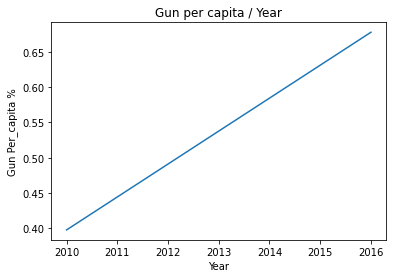

In [464]:
plt.plot(year,capita)
plt.xlabel('Year')
plt.ylabel('Gun Per_capita %')
plt.title("Gun per capita / Year")
plt.show()



Gun per capita in 2016: 0.677793390263384
Gun per capita in 2010: 0.397813332017810
So there's a spike between 2010 and 2016. 

array([[<AxesSubplot:title={'center':'totals'}>]], dtype=object)

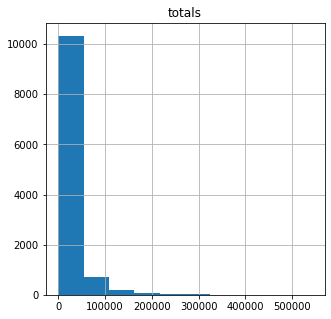

In [465]:
# Total gun distribution visualization
df_gun.hist(column="totals",figsize=(5,5))

Hist diagram showing total data. Will do comparison with permitted guns in the next graph. Majority of the guns has permits. 

array([[<AxesSubplot:title={'center':'permit'}>,
        <AxesSubplot:title={'center':'permit_recheck'}>,
        <AxesSubplot:title={'center':'handgun'}>,
        <AxesSubplot:title={'center':'long_gun'}>,
        <AxesSubplot:title={'center':'other'}>],
       [<AxesSubplot:title={'center':'multiple'}>,
        <AxesSubplot:title={'center':'admin'}>,
        <AxesSubplot:title={'center':'prepawn_handgun'}>,
        <AxesSubplot:title={'center':'prepawn_long_gun'}>,
        <AxesSubplot:title={'center':'prepawn_other'}>],
       [<AxesSubplot:title={'center':'redemption_handgun'}>,
        <AxesSubplot:title={'center':'redemption_long_gun'}>,
        <AxesSubplot:title={'center':'redemption_other'}>,
        <AxesSubplot:title={'center':'returned_handgun'}>,
        <AxesSubplot:title={'center':'returned_long_gun'}>],
       [<AxesSubplot:title={'center':'returned_other'}>,
        <AxesSubplot:title={'center':'rentals_handgun'}>,
        <AxesSubplot:title={'center':'rentals_long_gun

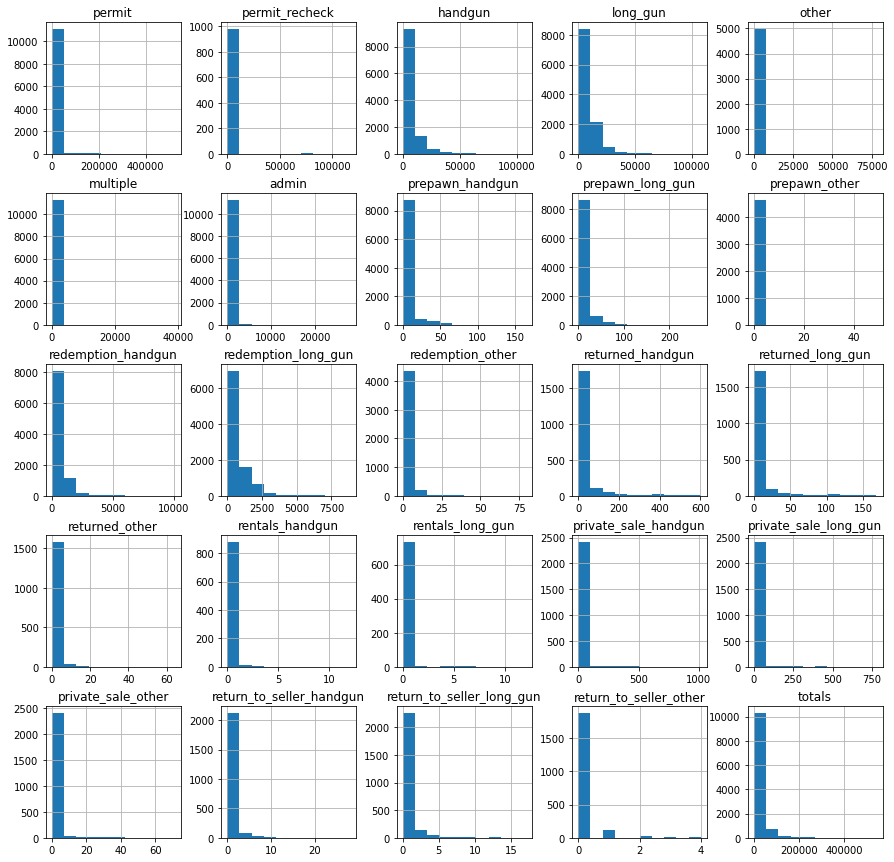

In [466]:
# Type of guns, permits visualization
df_gun.hist(figsize=(15,15))

Made a hist diagram to have an over all view of gun ownership types, and based on the data most of the guns has permits.

# Which states have had the highest growth in gun across 2010, 2015, 2016, and 2017?

States with highest gun counts in 2010-2017:

1) Breakdown of total guns by state

<AxesSubplot:title={'center':'Total gun breakdown by states'}, xlabel='State', ylabel='Total guns'>

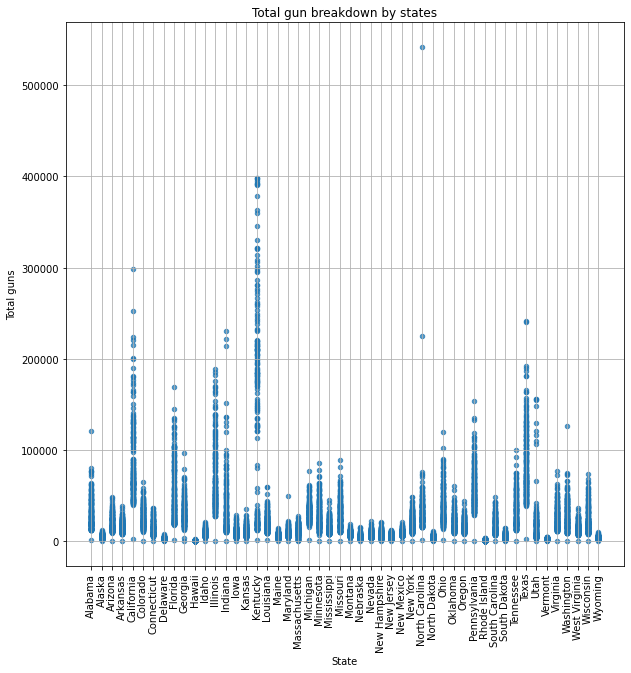

In [467]:
df_gun.plot(x='state',y='totals',kind='scatter',figsize=(10,10),title="Total gun breakdown by states",xlabel="State",ylabel="Total guns",alpha=0.75, rot=90,grid=True)

North Carolina has the most total guns in one month: 2014-03
States with highest total guns in a single month: North Carolina, Kentucky, California, Texas, and Indiana.

In [468]:
### States with highest total guns in a single month: 
bucket_totalgunsTop=df_gun.groupby(by=['state','month']).apply(lambda x: pd.Series({"Total Guns":x['totals'].sum()})).sort_values("Total Guns",ascending=False).reset_index()
bucket_topstates=bucket_totalgunsTop.head(50)
bucket_topstates=bucket_topstates['state'].unique()
print("States with the top count of total guns in one month:\n"+str(bucket_topstates))
print(bucket_totalgunsTop.head(10))

States with the top count of total guns in one month:
['North Carolina' 'Kentucky' 'California' 'Texas' 'Indiana']
            state    month  Total Guns
0  North Carolina  2014-03      541978
1        Kentucky  2017-09      398706
2        Kentucky  2017-03      397959
3        Kentucky  2016-12      397059
4        Kentucky  2017-08      394718
5        Kentucky  2017-04      392685
6        Kentucky  2017-06      392002
7        Kentucky  2017-05      391740
8        Kentucky  2017-07      390494
9        Kentucky  2016-10      378973


2) Total guns in 2017 by state

In [469]:
# states with top gun counts in 2017
df_gunTotal17=df_gun[df_gun['month'].str.contains("2017")].groupby("state").sum()
df_gunTotal17=df_gunTotal17.sort_values('totals',ascending=False)
df_gunTotal17=df_gunTotal17['totals']
df_gunTotal17.head(10)


state
Kentucky        3417976
California      1167528
Illinois        1163945
Texas           1074971
Florida          912765
Pennsylvania     763378
Indiana          606881
Tennessee        549639
Ohio             540654
Minnesota        529302
Name: totals, dtype: int64

Top states in terms of Total guns in 2017. Kentucky is the leadin state

<AxesSubplot:title={'center':'Total gun breakdown by states in 2017'}, xlabel='State', ylabel='Total guns'>

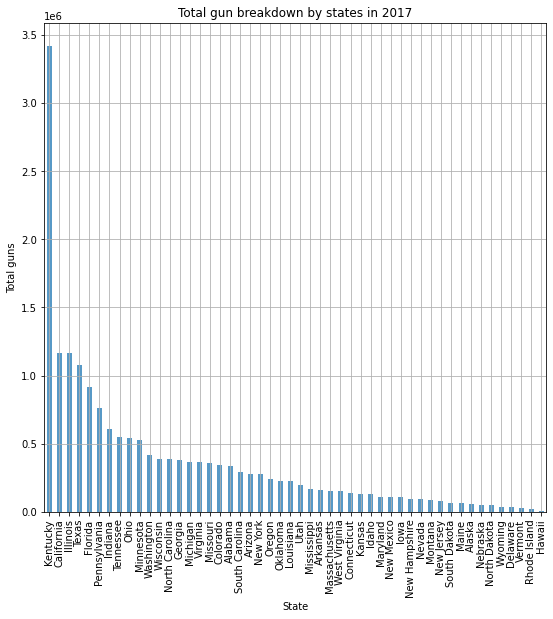

In [470]:
#Plotting Total guns in 2017: 
df_gunTotal17.reset_index()
df_gunTotal17.plot(x='state',y='totals',kind='bar',figsize=(9,9),title="Total gun breakdown by states in 2017",xlabel="State",ylabel="Total guns",alpha=0.75, rot=90,grid=True)


Kentukcy is leading the trend in terms of gun totals, and should be a focus area as it's leading the analysis in 2017-2010. 

In [471]:
## Merging census data and gun merge data: 
gun_census_data = census_merge.merge(gun_merge, on='state', how='left')
gun_census_data.head()

state  Population estimates base, April 1, 2010,  (V2016)  \
0     Alabama                                          4780131.0    
1      Alaska                                           710249.0    
2     Arizona                                          6392301.0    
3    Arkansas                                          2916025.0    
4  California                                         37254522.0    

   Population estimates, July 1, 2016,  (V2016) month_2010  totals_2010  \
0                                     4863300.0 2010-04-01        20791   
1                                      741894.0 2010-04-01         6411   
2                                     6931071.0 2010-04-01        16578   
3                                     2988248.0 2010-04-01        14563   
4                                    39250017.0 2010-04-01        80750   

  month_2016  totals_2016  
0 2016-07-01        48927  
1 2016-07-01         6793  
2 2016-07-01        34496  
3 2016-07-01        19378  
4 2016-07-01       190218

3) Total guns in 2016

In [472]:
# print gun totals top states in 2016: 
df_gunTotal16=df_gun[df_gun['month'].str.contains("2016")].groupby("state").sum()
df_gunTotal16=df_gunTotal16.sort_values('totals',ascending=False)
df_gunTotal16=df_gunTotal16['totals']
df_gunTotal16.head(10)

state
Kentucky        3676847
California      2377167
Illinois        1924070
Texas           1721726
Indiana         1436725
Florida         1435340
Pennsylvania    1143220
Ohio             875724
Tennessee        714774
Washington       713996
Name: totals, dtype: int64

Top states in terms of total guns on 2016. Kentucky is the leading state.

<AxesSubplot:title={'center':'Total gun breakdown by states in 2016'}, xlabel='State', ylabel='Total guns'>

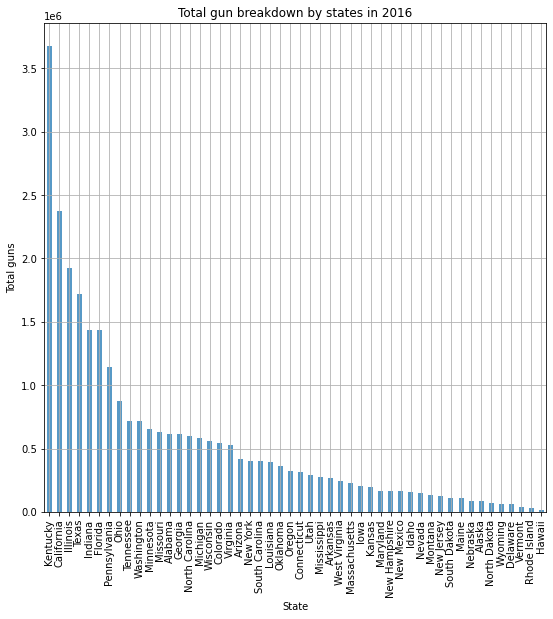

In [473]:
# plot gun totals in 2016 per state:
df_gunTotal16.reset_index()
df_gunTotal16.plot(x='state',y='totals',kind='bar',figsize=(9,9),title="Total gun breakdown by states in 2016",xlabel="State",ylabel="Total guns",alpha=0.75, rot=90,grid=True)

Kentukcy is leading the trend followed by California, and Illonios in 2016

4) Total guns in 2015

In [474]:
# states with top total of guns in 2015
df_gunTotal15=df_gun[df_gun['month'].str.contains("2015")].groupby("state").sum()
df_gunTotal15=df_gunTotal15.sort_values('totals',ascending=False)
df_gunTotal15=df_gunTotal15['totals']
df_gunTotal15.head(10)

state
Kentucky        3218371
California      1761079
Texas           1574266
Illinois        1247398
Florida         1147082
Indiana         1076917
Pennsylvania     993429
Ohio             748502
Alabama          737509
Tennessee        654192
Name: totals, dtype: int64

Top states in terms of total guns in 2015

<AxesSubplot:title={'center':'Total gun breakdown by states in 2015'}, xlabel='State', ylabel='Total guns'>

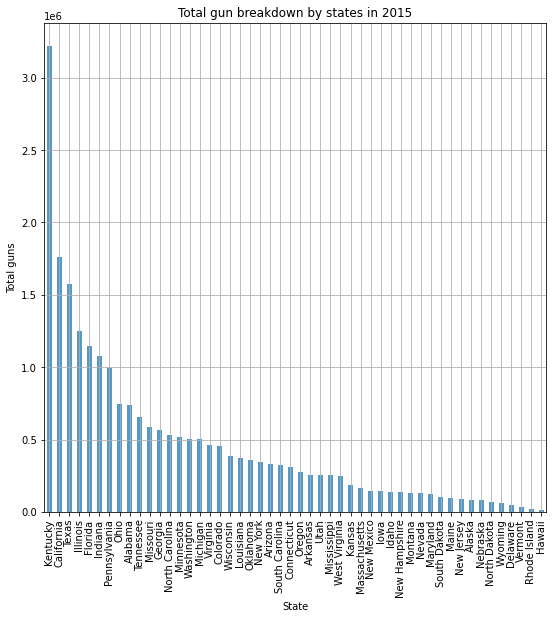

In [475]:
## Plotting total guns data in 2015:
df_gunTotal15.reset_index()
df_gunTotal15.plot(x='state',y='totals',kind='bar',figsize=(9,9),title="Total gun breakdown by states in 2015",xlabel="State",ylabel="Total guns",alpha=0.75, rot=90,grid=True)



Kentukcy is leading the trend followed by California, and Texas in 2015

5) Total guns in 2010

In [476]:

# states with top total of guns in 2010

df_gunTotal10=df_gun[df_gun['month'].str.contains("2010")].groupby("state").sum()
df_gunTotal10=df_gunTotal10.sort_values('totals',ascending=False)
df_gunTotal10=df_gunTotal10['totals']
df_gunTotal10.head(10)


state
Kentucky        2385579
Texas            968071
California       816399
Illinois         695300
Pennsylvania     626677
Florida          559347
Utah             553134
Tennessee        411024
Ohio             393250
Missouri         349672
Name: totals, dtype: int64

<AxesSubplot:title={'center':'Total gun breakdown by states in 2010'}, xlabel='State', ylabel='Total guns'>

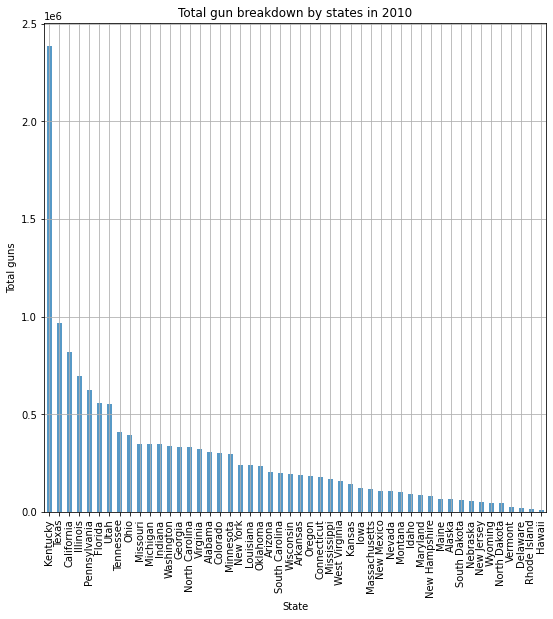

In [477]:
## Plotting total guns data in 2015:

df_gunTotal10.reset_index()
df_gunTotal10.plot(x='state',y='totals',kind='bar',figsize=(9,9),title="Total gun breakdown by states in 2010",xlabel="State",ylabel="Total guns",alpha=0.75, rot=90,grid=True)

Kentukcy is leading the trend in terms of gun totals followed by Texas and California in 2010

6) Show/Plot Gun data per state in 2010

In [478]:
# Top states in terms of guns on April 2010
df_gunTotalApril10=(gun_census_data[['state','month_2010','totals_2010']].sort_values('totals_2010',ascending=False).head(10))
df_gunTotalApril10

state month_2010  totals_2010
16      Kentucky 2010-04-01       211261
43          Utah 2010-04-01       109391
4     California 2010-04-01        80750
42         Texas 2010-04-01        65012
12      Illinois 2010-04-01        53929
37  Pennsylvania 2010-04-01        50249
45      Virginia 2010-04-01        44137
8        Florida 2010-04-01        42794
34          Ohio 2010-04-01        31312
41     Tennessee 2010-04-01        30453

Top states with guns on april 2010.

<AxesSubplot:title={'center':'Total gun breakdown by states in April 2010'}, xlabel='State', ylabel='Total guns'>

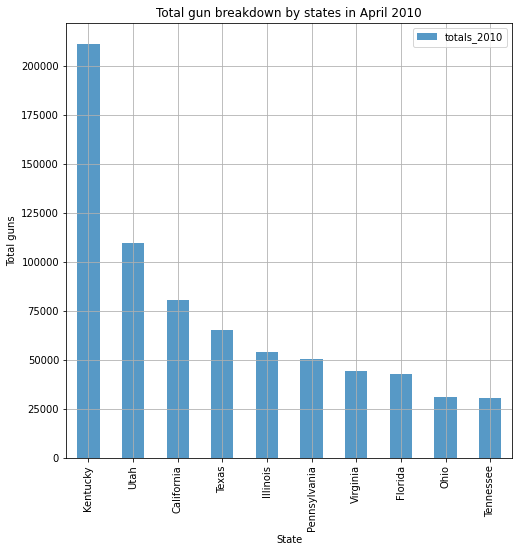

In [479]:
## Plotting April 2010 total guns
df_gunTotalApril10.plot(x='state',y='totals_2010',kind='bar',figsize=(8,8),title="Total gun breakdown by states in April 2010",xlabel="State",ylabel="Total guns",alpha=0.75, rot=90,grid=True)

Kentukcy is leading the trend in terms of gun totals on April 2010 followed by Utah, and California

7) Show/Plot Gun data in July 2016

In [480]:
# States with highest gun totals in july 2016. Kentucky, California, and Illinois are leading
df_gunTotalJul16=gun_census_data[['state','month_2016','totals_2016']].sort_values('totals_2016',ascending=False).head(10)
df_gunTotalJul16

state month_2016  totals_2016
16      Kentucky 2016-07-01       363085
4     California 2016-07-01       190218
12      Illinois 2016-07-01       168227
42         Texas 2016-07-01       127207
8        Florida 2016-07-01       125208
13       Indiana 2016-07-01        88340
37  Pennsylvania 2016-07-01        86137
34          Ohio 2016-07-01        63148
41     Tennessee 2016-07-01        57653
9        Georgia 2016-07-01        49183

<AxesSubplot:title={'center':'Total gun breakdown by states in July 2016'}, xlabel='State', ylabel='Total guns'>

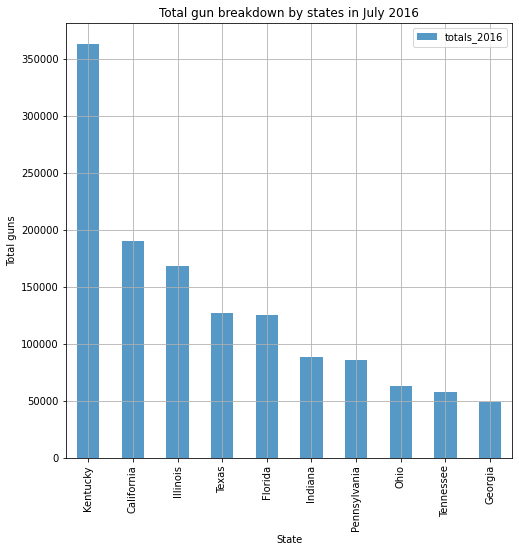

In [481]:
df_gunTotalJul16.plot(x='state',y='totals_2016',kind='bar',figsize=(8,8),title="Total gun breakdown by states in July 2016",xlabel="State",ylabel="Total guns",alpha=0.75, rot=90,grid=True)

Kentukcy is leading the trend in terms of gun totals on April 2010 followed by Utah, and California

8) Show/Plot Gun data in July 2017

In [482]:
# Show the states with highest gun counts on July 2017. Kentucky, Callifornia and Illnois are leading
df_gunJul2017=df_gun[df_gun['month']=="2017-07"]
df_gunTotalJul17=(df_gunJul2017[['state','month','totals']].sort_values('totals',ascending=False).head(10))
#df_gun.groupby(by=['state','month']).apply(lambda x: pd.Series({"Total Guns":x['totals'].sum()}))#
df_gunTotalJul17

state    month  totals
128      Kentucky  2017-07  390494
114    California  2017-07  114595
124      Illinois  2017-07  108000
156         Texas  2017-07   98338
119       Florida  2017-07   92822
150  Pennsylvania  2017-07   73654
155     Tennessee  2017-07   52643
147          Ohio  2017-07   49432
125       Indiana  2017-07   47145
135     Minnesota  2017-07   41186

<AxesSubplot:title={'center':'Total gun breakdown by states in July 2017'}, xlabel='State', ylabel='Total guns'>

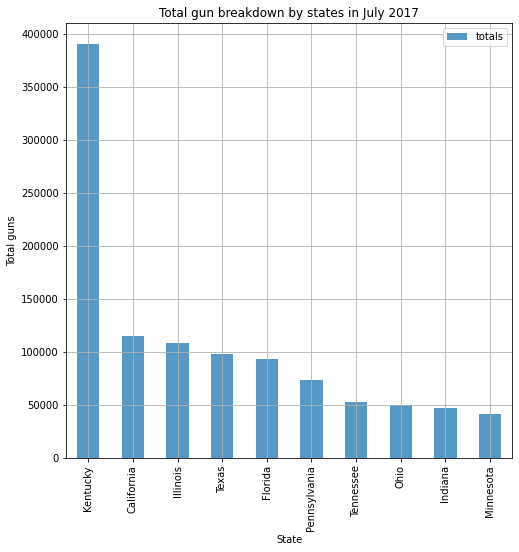

In [483]:
df_gunTotalJul17.plot(x='state',y='totals',kind='bar',figsize=(8,8),title="Total gun breakdown by states in July 2017",xlabel="State",ylabel="Total guns",alpha=0.75, rot=90,grid=True)


Even on month-year basis, kentucky is leading the gun total trend. check the above 3 graphs

# 3- What is the overall trend of gun purchases in the states mentioned in point 2?

Total guns trends in the states with the highest gun (by month_year):

1) Total guns trends in Kentucky by Month-Year:

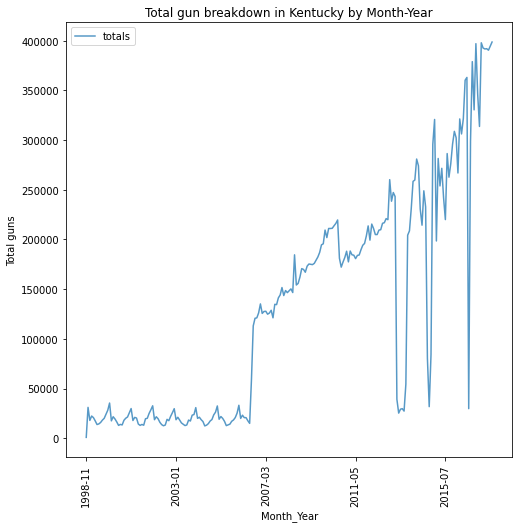

In [484]:
Kentucky_tg=df_gun[df_gun['state']=='Kentucky'].sort_values("month",ascending=True)
Kentucky_tg[['month','totals']].plot(kind='line',x='month',y='totals',figsize=(8,8),title="Total gun breakdown in Kentucky by Month-Year",xlabel="Month_Year",ylabel="Total guns",alpha=0.75, rot=90);


Kentucky is leading the trend and the total guns are increasing. The drop in the curve needs to be verified in the future. 

In [485]:
Kentucky_tg[Kentucky_tg['totals']== Kentucky_tg['totals'].max()] 

month     state    permit  permit_recheck  handgun  long_gun  other  \
18  2017-09  Kentucky  378384.0             0.0   8112.0    7543.0  253.0   

    multiple  admin  prepawn_handgun  ...  returned_other  rentals_handgun  \
18       543    1.0             16.0  ...             0.0              0.0   

    rentals_long_gun  private_sale_handgun  private_sale_long_gun  \
18               0.0                  21.0                   19.0   

    private_sale_other  return_to_seller_handgun  return_to_seller_long_gun  \
18                 1.0                       2.0                        1.0   

    return_to_seller_other  totals  
18                     0.0  398706  

[1 rows x 27 columns]

This date need to be investigated further to understand the spike

In [486]:
Kentucky_tg[Kentucky_tg['totals']== Kentucky_tg['totals'].min()] 

month     state  permit  permit_recheck  handgun  long_gun  other  \
12448  1998-11  Kentucky     0.0             NaN    368.0     462.0    NaN   

       multiple  admin  prepawn_handgun  ...  returned_other  rentals_handgun  \
12448        10    0.0              NaN  ...             NaN              NaN   

       rentals_long_gun  private_sale_handgun  private_sale_long_gun  \
12448               NaN                   NaN                    NaN   

       private_sale_other  return_to_seller_handgun  \
12448                 NaN                       NaN   

       return_to_seller_long_gun  return_to_seller_other  totals  
12448                        NaN                     NaN     840  

[1 rows x 27 columns]

1998-11 need to be investigated further to understand the drop.

2) Total guns trends in California by Month-Year:

In [487]:
# Got California numbers followed by max / peak and for future analysis, 12-2016 needs to be investigated in terms of guns. 

california_tg=df_gun[df_gun['state']=='California'].sort_values("month",ascending=True)

california_tg[california_tg['totals']== california_tg['totals'].max()]

month       state   permit  permit_recheck  handgun  long_gun    other  \
499  2016-12  California  61808.0             0.0  63649.0   93224.0  77929.0   

     multiple  admin  prepawn_handgun  ...  returned_other  rentals_handgun  \
499         0    0.0              0.0  ...             0.0              0.0   

     rentals_long_gun  private_sale_handgun  private_sale_long_gun  \
499               0.0                   0.0                    0.0   

     private_sale_other  return_to_seller_handgun  return_to_seller_long_gun  \
499                 0.0                       0.0                        0.0   

     return_to_seller_other  totals  
499                     0.0  298161  

[1 rows x 27 columns]

California numbers had peak on 12-2016 that needs to be investigated in terms of guns. 


In [488]:
california_tg[california_tg['totals']== california_tg['totals'].min()]

month       state  permit  permit_recheck  handgun  long_gun  other  \
12434  1998-11  California   434.0             NaN    717.0     950.0    NaN   

       multiple  admin  prepawn_handgun  ...  returned_other  rentals_handgun  \
12434         0    0.0              NaN  ...             NaN              NaN   

       rentals_long_gun  private_sale_handgun  private_sale_long_gun  \
12434               NaN                   NaN                    NaN   

       private_sale_other  return_to_seller_handgun  \
12434                 NaN                       NaN   

       return_to_seller_long_gun  return_to_seller_other  totals  
12434                        NaN                     NaN    2101  

[1 rows x 27 columns]

California numbers had drop on 11-1998 that needs to be investigated in terms of guns. 


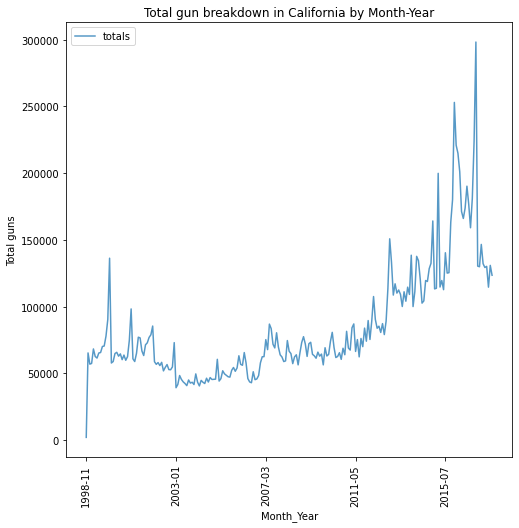

In [489]:
# Plotting trends of California:
california_tg[['month','totals']].plot(kind='line',x='month',y='totals',figsize=(8,8),title="Total gun breakdown in California by Month-Year",xlabel="Month_Year",ylabel="Total guns",alpha=0.75, rot=90);


California peak on 12-2016. 


3) Total guns trends in Texas by Month-Year:

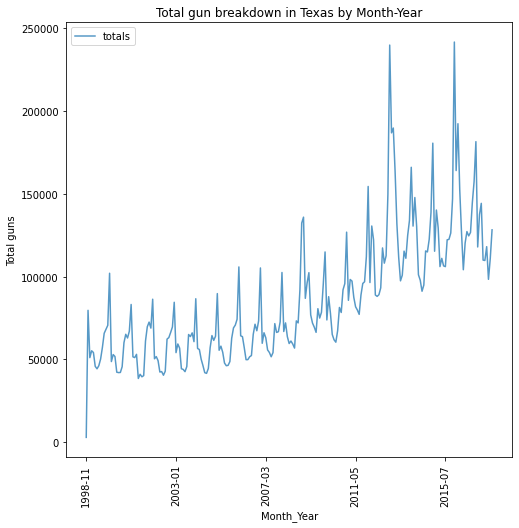

In [490]:
Texas_tg=df_gun[df_gun['state']=='Texas'].sort_values("month",ascending=True)
Texas_tg[['month','totals']].plot(kind='line',x='month',y='totals',figsize=(8,8),title="Total gun breakdown in Texas by Month-Year",xlabel="Month_Year",ylabel="Total guns",alpha=0.75, rot=90);



Graph showing total gun in Texas per year month. 2015-12 is peak that needs investigation

In [491]:
Texas_tg[Texas_tg['totals']== Texas_tg['totals'].max()] 

month  state   permit  permit_recheck   handgun  long_gun   other  \
1201  2015-12  Texas  33163.0             NaN  107224.0   80247.0  4585.0   

      multiple  admin  prepawn_handgun  ...  returned_other  rentals_handgun  \
1201      4505    0.0             47.0  ...             2.0              NaN   

      rentals_long_gun  private_sale_handgun  private_sale_long_gun  \
1201               NaN                  60.0                   52.0   

      private_sale_other  return_to_seller_handgun  return_to_seller_long_gun  \
1201                12.0                       1.0                        5.0   

      return_to_seller_other  totals  
1201                     1.0  241791  

[1 rows x 27 columns]

Texas has a spike in 2015-12 needs to be investigated in the future

In [492]:
Texas_tg[Texas_tg['totals']== Texas_tg['totals'].min()] 

month  state  permit  permit_recheck  handgun  long_gun  other  \
12476  1998-11  Texas     0.0             NaN   1384.0    1349.0    NaN   

       multiple  admin  prepawn_handgun  ...  returned_other  rentals_handgun  \
12476        60    1.0              NaN  ...             NaN              NaN   

       rentals_long_gun  private_sale_handgun  private_sale_long_gun  \
12476               NaN                   NaN                    NaN   

       private_sale_other  return_to_seller_handgun  \
12476                 NaN                       NaN   

       return_to_seller_long_gun  return_to_seller_other  totals  
12476                        NaN                     NaN    2794  

[1 rows x 27 columns]

Texas has a drop happened in 1998-11

4) Total guns trends in Florida by Month-Year:

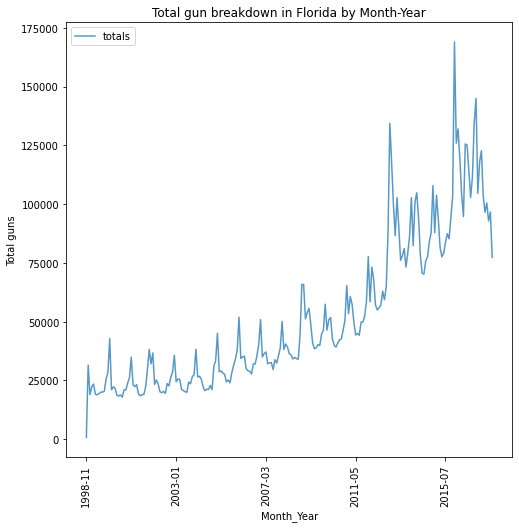

In [493]:

Florida_tg=df_gun[df_gun['state']=='Florida'].sort_values("month",ascending=True)
Florida_tg[['month','totals']].plot(kind='line',x='month',y='totals',figsize=(8,8),title="Total gun breakdown in Florida by Month-Year",xlabel="Month_Year",ylabel="Total guns",alpha=0.75, rot=90);



Graph shows breakdown of total gun in Month-Year. 2015-12 needs to be investigated further for the spike. 

In [494]:
Florida_tg[Florida_tg['totals']== Florida_tg['totals'].max()] 

month    state   permit  permit_recheck  handgun  long_gun   other  \
1164  2015-12  Florida  25044.0             NaN  86940.0   45769.0  4165.0   

      multiple  admin  prepawn_handgun  ...  returned_other  rentals_handgun  \
1164      3005   85.0             22.0  ...             0.0              NaN   

      rentals_long_gun  private_sale_handgun  private_sale_long_gun  \
1164               NaN                  64.0                   37.0   

      private_sale_other  return_to_seller_handgun  return_to_seller_long_gun  \
1164                 2.0                       1.0                        0.0   

      return_to_seller_other  totals  
1164                     0.0  168935  

[1 rows x 27 columns]

Florida had a spike on 2015-12 needs to be investigated in the future

In [495]:
Florida_tg[Florida_tg['totals']== Florida_tg['totals'].min()] 

month    state  permit  permit_recheck  handgun  long_gun  other  \
12439  1998-11  Florida     0.0             NaN    319.0     443.0    NaN   

       multiple  admin  prepawn_handgun  ...  returned_other  rentals_handgun  \
12439        10   40.0              NaN  ...             NaN              NaN   

       rentals_long_gun  private_sale_handgun  private_sale_long_gun  \
12439               NaN                   NaN                    NaN   

       private_sale_other  return_to_seller_handgun  \
12439                 NaN                       NaN   

       return_to_seller_long_gun  return_to_seller_other  totals  
12439                        NaN                     NaN     812  

[1 rows x 27 columns]

Florida had drop in 1998-11

5) Total guns trends in Illinois by Month-Year:

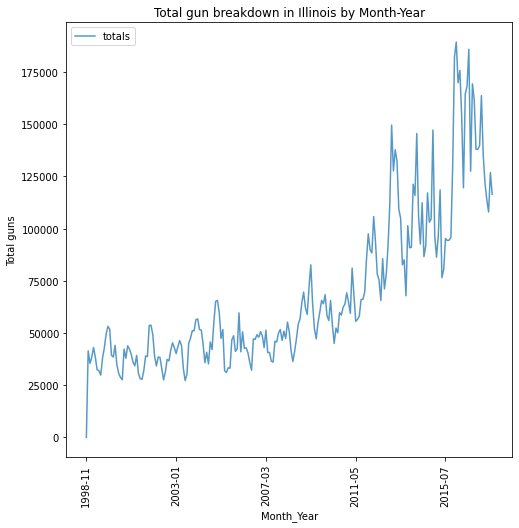

In [496]:
Illinois_tg=df_gun[df_gun['state']=='Illinois'].sort_values("month",ascending=True)
Illinois_tg[['month','totals']].plot(kind='line',x='month',y='totals',figsize=(8,8),title="Total gun breakdown in Illinois by Month-Year",xlabel="Month_Year",ylabel="Total guns",alpha=0.75, rot=90);



Graph shows Illinois breakdown of total gun in Month-Year. 2016-1 needs to be investigated further for the spike. 

In [497]:
Illinois_tg[Illinois_tg['totals']== Illinois_tg['totals'].max()]  

month     state    permit  permit_recheck  handgun  long_gun  other  \
1114  2016-01  Illinois  143606.0             NaN  32112.0   12869.0    0.0   

      multiple  admin  prepawn_handgun  ...  returned_other  rentals_handgun  \
1114       813    0.0              0.0  ...             0.0              NaN   

      rentals_long_gun  private_sale_handgun  private_sale_long_gun  \
1114               NaN                   0.0                    0.0   

      private_sale_other  return_to_seller_handgun  return_to_seller_long_gun  \
1114                 0.0                       0.0                        0.0   

      return_to_seller_other  totals  
1114                     0.0  189400  

[1 rows x 27 columns]

Illinois had a spike happened in 2016-01 and can be investigated further

In [498]:
Illinois_tg[Illinois_tg['totals']== Illinois_tg['totals'].min()]

month     state  permit  permit_recheck  handgun  long_gun  other  \
12444  1998-11  Illinois     4.0             NaN      0.0      18.0    NaN   

       multiple  admin  prepawn_handgun  ...  returned_other  rentals_handgun  \
12444         0    0.0              NaN  ...             NaN              NaN   

       rentals_long_gun  private_sale_handgun  private_sale_long_gun  \
12444               NaN                   NaN                    NaN   

       private_sale_other  return_to_seller_handgun  \
12444                 NaN                       NaN   

       return_to_seller_long_gun  return_to_seller_other  totals  
12444                        NaN                     NaN      22  

[1 rows x 27 columns]

Illinois had a drop happened in 1998-11

# 4- Is there a relation between demographics and total guns (e.g race/gender)

Relation between states with high gun total and Race / Gender

1) Relation between states with high gun total and White:

In [499]:
population_2016White[(population_2016White['state']=='Kentucky')|(population_2016White['state']=='California')|(population_2016White['state']=='Florida')|(population_2016White['state']=='Texas')|(population_2016White['state']=='Illinois')].sort_values(col_White_2016,ascending=False)

Fact       state  White alone, percent, July 1, 2016,  (V2016)
16      Kentucky                                          88.0
42         Texas                                          79.4
8        Florida                                          77.6
12      Illinois                                          77.2
4     California                                          72.7

States with the top counts of total guns all have white majority

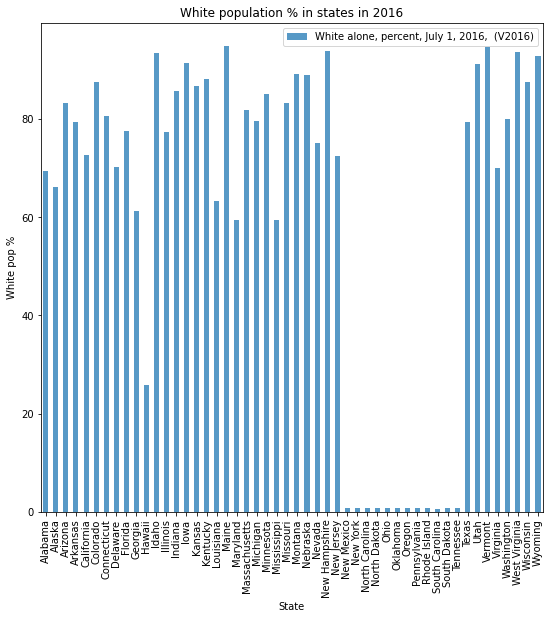

In [500]:
# States white population % 
population_2016White.plot(x='state',y=col_White_2016,kind='bar',figsize=(9,9),title="White population % in states in 2016",xlabel="State",ylabel="White pop %",alpha=0.75, rot=90);

I suspect Census data is in accurate as some state shows minimal pop percentage in white, black and latino races. e.g North carolina

2 Relation between states with high gun total and black:

In [501]:
# black population in states with high total gun counts is a minority. 
population_2016Black[(population_2016Black['state']=='Kentucky')|(population_2016Black['state']=='California')|(population_2016Black['state']=='Florida')|(population_2016Black['state']=='Texas')|(population_2016Black['state']=='Illinois')].sort_values(col_Black_2016,ascending=False)


Fact       state  \
8        Florida   
12      Illinois   
42         Texas   
16      Kentucky   
4     California   

Fact  Black or African American alone, percent, July 1, 2016,  (V2016)  
8                                                  16.8                 
12                                                 14.7                 
42                                                 12.6                 
16                                                  8.3                 
4                                                   6.5

Black population is a minority in the 5 states

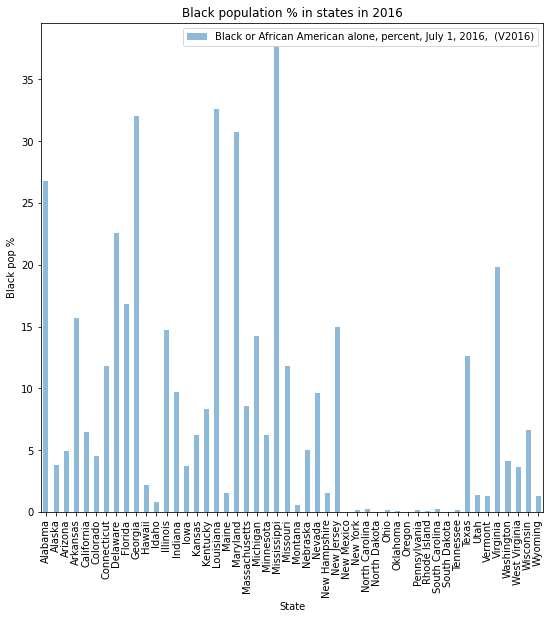

In [502]:
population_2016Black.plot(x='state',y=col_Black_2016,kind='bar',figsize=(9,9),title="Black population % in states in 2016",xlabel="State",ylabel="Black pop %",alpha=0.5, rot=90);

Graph shows the black population in 2016. I suspect census data is innaccurate as states New Jeresy, New York, North Carolina ..etc has zero values

3. Relation between gun totals and latino population %

In [503]:
# Latinos population in states with high total gun counts is a minority
population_2016Latino[(population_2016Latino['state']=='Kentucky')|(population_2016Latino['state']=='California')|(population_2016Latino['state']=='Florida')|(population_2016Latino['state']=='Texas')|(population_2016Latino['state']=='Illinois')].sort_values(col_Latino_2016,ascending=False)


Fact       state  Hispanic or Latino, percent, July 1, 2016,  (V2016)
42         Texas                                               39.1  
4     California                                               38.9  
8        Florida                                               24.9  
12      Illinois                                               17.0  
16      Kentucky                                                3.5

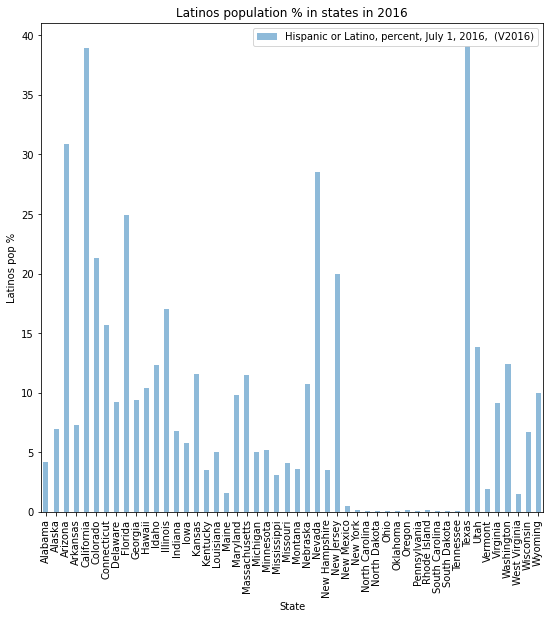

In [504]:
population_2016Latino.plot(x='state',y=col_Latino_2016,kind='bar',figsize=(9,9),title="Latinos population % in states in 2016",xlabel="State",ylabel="Latinos pop %",alpha=0.5, rot=90);

Latinos population in states with high total gun counts is a minority. Latino population is almost zeros in New York, North Carolina..etc. Census data seems to be innaccurate.


4. Relation between Mixed race population % and top total gun counts

In [505]:
population_2016Mixed[(population_2016Mixed['state']=='Kentucky')|(population_2016Mixed['state']=='California')|(population_2016Mixed['state']=='Florida')|(population_2016Mixed['state']=='Texas')|(population_2016Mixed['state']=='Illinois')].sort_values(col_Mixed_2016,ascending=False)


Fact       state  Two or More Races, percent, July 1, 2016,  (V2016)
4     California                                                3.8 
8        Florida                                                2.1 
12      Illinois                                                1.9 
16      Kentucky                                                1.9 
42         Texas                                                1.9

Mixed race population in top states in terms of total guns shows it's a minority population


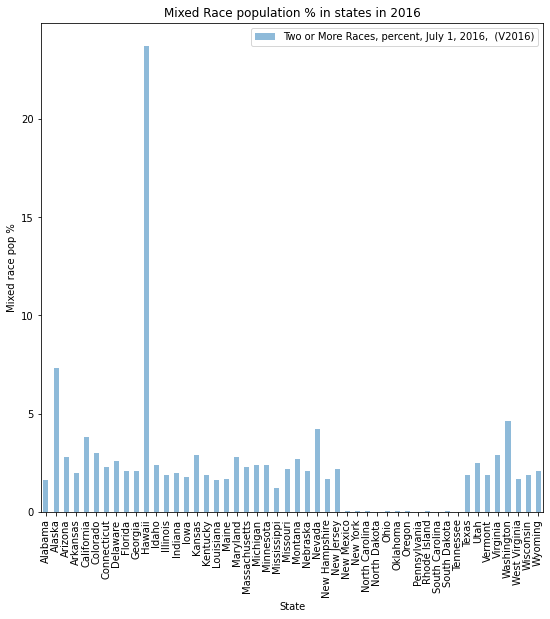

In [506]:
population_2016Mixed.plot(x='state',y=col_Mixed_2016,kind='bar',figsize=(9,9),title="Mixed Race population % in states in 2016",xlabel="State",ylabel="Mixed race pop %",alpha=0.5, rot=90);

Graph shows the Mixed race population in 2016. I suspect census data is innaccurate as states New Jeresy, New York, North Carolina ..etc has zero values

I suspect Census data is in accurate as some state shows minimal pop percentage in white, black and latino races and mixed race %. e.g New York.

5. Relation between female % and total guns

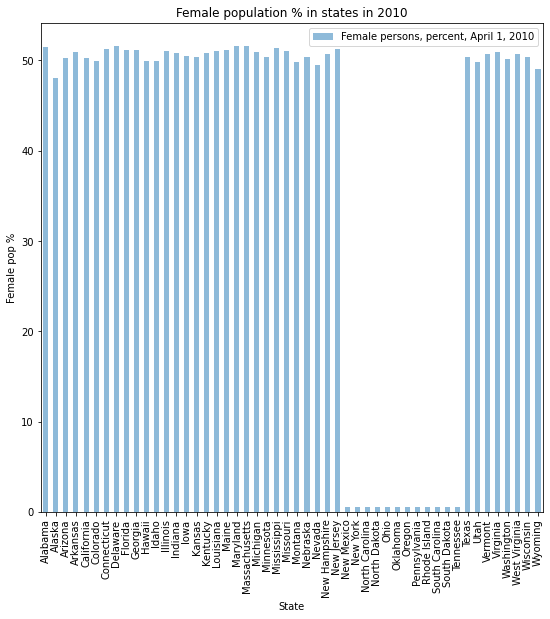

In [507]:
# Plotting Female % per states:
population_2010Females.plot(x='state',y=col_Female_2010,kind='bar',figsize=(9,9),title="Female population % in states in 2010",xlabel="State",ylabel="Female pop %",alpha=0.5, rot=90);

I suspect the female population data is innacurate as some states show less than 30% female pop please check the numbers below
e.g North Carolina, New York, North Dikota.

Side Note:
States with minmum female population

In [508]:

population_2010Females[population_2010Females[col_Female_2010]== population_2010Females[col_Female_2010].min()]

Fact         state  Female persons, percent, April 1, 2010
33    North Dakota                                   0.495

Table shows data that seems to be inaccurate e.g 0.495%

In [509]:
population_2010Females[population_2010Females[col_Female_2010]== population_2010Females[col_Female_2010].max()]

Fact          state  Female persons, percent, April 1, 2010
7          Delaware                                    51.6
19         Maryland                                    51.6
20    Massachusetts                                    51.6

States with maximum female population

In [510]:
population_2010Females[(population_2010Females['state']=='Kentucky')|(population_2010Females['state']=='California')|(population_2010Females['state']=='Florida')|(population_2010Females['state']=='Texas')|(population_2010Females['state']=='Illinois')].sort_values(col_Female_2010,ascending=False)


Fact       state  Female persons, percent, April 1, 2010
8        Florida                                    51.1
12      Illinois                                    51.0
16      Kentucky                                    50.8
42         Texas                                    50.4
4     California                                    50.3

Female population in the states with high gun data: 


There seems to be no correlation between female population and gun total

<a id='conclusions'></a>
# Conclusion

**Results:**

>1) Data comparison was done focusing on 2010 and 2016, as the census data covers these two years. However my analyis included total guns in 2017, 2016, 2015, and 2010. 
>
>2) Calculated  Gun per capita in 2010: 0.39%, and Gun per capita in 2016: 0.68%. So there's a spike from 2010 to 2016
>
>3) States with highest total gun counts annualy are: Kentucky, California, Texas, Illinois, and Florida.
>
>4) North Carolina has the most total guns in one month: 2014-03,but the Data is poor in terms of demographics. 
>
>5) States with highest total guns in a single month: North Carolina, Kentucky, California, Texas, and Indiana.
>
>6) Accordingly Kentucky is the key state in the gun trends in 2010, 2015, 2016, and 2017, and should be the focus area of further analysis of this data set. 
>
>7) Verified if demographics (race/gender) plays a role. All top states - with the exception of North Carolina that lacks data- are white majority  with average female population. 
>
>8) Majority of total guns are permitted guns.

**Limitations**
>1) Checked US census and gun data, and noticed that **gun data includes the five colonies e.g Porto Rico, ..etc.**, 
while **US census data doesn't include the colonies**, so I had to **remove all rows of the five colonies from gun data**. US census data need to cover the five colonies for more analysis. 
>
>2) US census data needs doublechecking e.g North Carolina doesn't show reasnoble numbers in terms of race and female population. A part from the analysis. I've also noticed that North Dakota has 0.49% female population, which is unrealistic, also the number of New york, North Carolina is innaccurate.
>
>3) Columns has unnecessary characters e.g ,,$,%" that makes data cleaning more challenging. 
